# Networks and Embeddings for Natural Language Processing

Outline:

1. Download the Data

2. Prepare Data for training

3. Logistic Regression Model

4. Feed Forward Neutral Network


In [88]:
import pandas as pd


In [7]:
raw_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
sub_df=pd.read_csv('sub.csv')

In [23]:
if IS_KAGGLE:
    sample_df = raw_df
else:
    sample_df = raw_df.sample(100_000, random_state=42)

In [8]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [9]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [10]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [12]:
raw_df.target.value_counts()

,count
target,
0,1225312
1,80810


#Prepare Data for Training

Outline:

1. Conver Text to TF-IDF Vectors

2. Split training & validataion set

3. Convert to pyTorch tensors

#Conversion to TF-IDF vectors



In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
stemmer=SnowballStemmer('english')

def tokenize(text):
  return [stemmer.stem(token) for token in word_tokenize(text)]

In [17]:
tokenize('I am learning NLP')

['i', 'am', 'learn', 'nlp']

In [18]:
english_stopwords=stopwords.words('english')

In [20]:
vec=TfidfVectorizer(lowercase=True,tokenizer=tokenize,
                    stop_words=english_stopwords,
                    max_features=1000,
                    token_pattern=None)

In [26]:
vec.fit(sample_df.question_text)

TfidfVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                token_pattern=None,
                tokenizer=<function tokenize at 0x7e624fe4e7a0>)

In [29]:
targets=sample_df.target

In [30]:
test_inputs=vec.transform(test_df.question_text)

In [31]:
inputs=vec.transform(sample_df.question_text)

##Split training and validation set

In [33]:
targets.shape

(100000,)

In [32]:
test_inputs.shape

(375806, 1000)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_val,y_train,y_val=train_test_split(inputs,targets,test_size=0.3,random_state=42)

In [36]:
x_train.shape,x_val.shape

((70000, 1000), (30000, 1000))

##Convert to PyTorch Tensors

In [54]:
import torch
from torch.utils.data import TensorDataset,DataLoader
import torch.nn.functional as F

In [46]:
train_tensors = F.normalize(torch.tensor(x_train.toarray()).float(), dim=0)
val_tensors = F.normalize(torch.tensor(x_val.toarray()).float(), dim=0)

In [50]:
train_targets_tensors=torch.tensor(y_train.values)
val_targets_tensors=torch.tensor(y_val.values)

In [47]:
train_tensors.shape, val_tensors.shape

(torch.Size([70000, 1000]), torch.Size([30000, 1000]))

In [51]:
train_ds = TensorDataset(train_tensors, train_targets_tensors)
val_ds = TensorDataset(val_tensors, val_targets_tensors)

In [55]:
batch_size = 128
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size)

In [56]:
for inputs_batch, targets_batch in train_dl:
    print('inputs.shape', inputs_batch.shape)
    print('targets.shape', targets_batch.shape)
    print(targets_batch)
    break

inputs.shape torch.Size([128, 1000])
targets.shape torch.Size([128])
tensor([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0])


#Logistic Regression Model

In [57]:
import torch.nn as nn

In [58]:
class LogReg(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(1000,1)

  def forward(self,xb):
    out=self.linear1(xb)
    return out

In [59]:
import numpy as np

In [60]:
from sklearn.metrics import accuracy_score,f1_score

In [61]:
logreg_model=LogReg()

In [62]:
for batch in val_dl:
    batch_inputs, batch_targets = batch
    print('inputs.shape', batch_inputs.shape)
    print('targets', batch_targets)

    batch_out = logreg_model(batch_inputs)
    probs = torch.sigmoid(batch_out[:,0])
    preds = (probs >= 0.5).int()

    print('outputs', preds)
    print('accuracy', accuracy_score(batch_targets, preds))
    print('f1_score', f1_score(batch_targets, preds))
    break

inputs.shape torch.Size([128, 1000])
targets tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0])
outputs tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1], dtype=torch.int32)
accuracy 0.0625
f1_score 0.11764705882352941


In [63]:
def evaluate(model, dl):
    losses, accs, f1s = [], [], []
    for batch in dl:
        inputs, targets = batch
        out = model(inputs)

        probs = torch.sigmoid(out[:,0])
        loss = F.binary_cross_entropy(probs, targets.float(), weight=torch.tensor(20.))
        losses.append(loss.item())

        preds = (probs > 0.5).int()
        acc = accuracy_score(targets, preds)
        f1 = f1_score(targets, preds)

        accs.append(acc)
        f1s.append(f1)

    return np.mean(losses), np.mean(accs), np.mean(f1s)

In [64]:
def fit(epochs, lr, model, train_loader, val_loader):
    optimizer = torch.optim.Adam(model.parameters(), lr, weight_decay=1e-5)
    history = [] # for recording epoch-wise results

    for epoch in range(epochs):

        # Training Phase
        for batch in train_loader:
            inputs, targets = batch
            out = model(inputs)
            probs = torch.sigmoid(out[:,0])
            loss = F.binary_cross_entropy(probs,
                                          targets.float(),
                                          weight=torch.tensor(20.))
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation phase
        result = evaluate(model, val_loader)
        loss, acc, f1 = result
        print('Epoch: {}; Loss: {:.4f}; Accuracy: {:.4f}; F1 Score: {:.4f}'.format(
            epoch, loss, acc, f1))
        history.append(result)

    return history

In [65]:
logreg_model = LogReg()

In [66]:
history = [evaluate(logreg_model, val_dl)]

In [67]:
history

[(13.950922718453915, 0.06140292553191489, 0.11376376500074767)]

In [68]:
history += fit(5, 0.01, logreg_model, train_dl, val_dl)

Epoch: 0; Loss: 4.3554; Accuracy: 0.9393; F1 Score: 0.0000
Epoch: 1; Loss: 4.0328; Accuracy: 0.9393; F1 Score: 0.0000
Epoch: 2; Loss: 3.7712; Accuracy: 0.9393; F1 Score: 0.0000
Epoch: 3; Loss: 3.5598; Accuracy: 0.9394; F1 Score: 0.0041
Epoch: 4; Loss: 3.3998; Accuracy: 0.9397; F1 Score: 0.0222


In [69]:
history += fit(5, 0.01, logreg_model, train_dl, val_dl)

Epoch: 0; Loss: 3.2794; Accuracy: 0.9411; F1 Score: 0.0877
Epoch: 1; Loss: 3.2038; Accuracy: 0.9426; F1 Score: 0.1695
Epoch: 2; Loss: 3.1356; Accuracy: 0.9436; F1 Score: 0.2220
Epoch: 3; Loss: 3.1029; Accuracy: 0.9449; F1 Score: 0.2899
Epoch: 4; Loss: 3.0725; Accuracy: 0.9455; F1 Score: 0.3308


In [70]:
history += fit(5, 0.01, logreg_model, train_dl, val_dl)

Epoch: 0; Loss: 3.0594; Accuracy: 0.9461; F1 Score: 0.3671
Epoch: 1; Loss: 3.0407; Accuracy: 0.9464; F1 Score: 0.3852
Epoch: 2; Loss: 3.0618; Accuracy: 0.9461; F1 Score: 0.4125
Epoch: 3; Loss: 3.0676; Accuracy: 0.9459; F1 Score: 0.4228
Epoch: 4; Loss: 3.0301; Accuracy: 0.9460; F1 Score: 0.4223


In [71]:
losses = [item[0] for item in history]

In [72]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Loss')

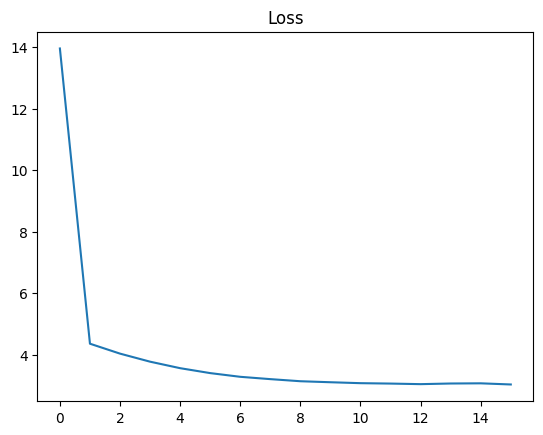

In [73]:
plt.plot(losses);
plt.title('Loss')

In [74]:
f1s = [item[2] for item in history]

Text(0.5, 1.0, 'F1 Score')

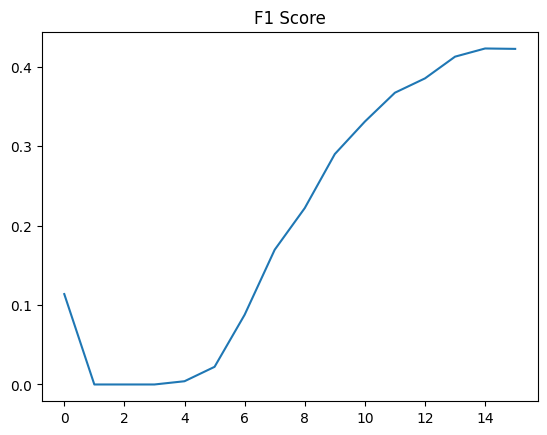

In [75]:
plt.plot(f1s)
plt.title('F1 Score')

#Feed Forward Neural Network

In [76]:
class FeedForwardModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(1000, 512)
        self.linear2 = nn.Linear(512, 256)
        self.linear3 = nn.Linear(256, 128)
        self.linear4 = nn.Linear(128, 1)

    def forward(self, xb):
        out = F.relu(self.linear1(xb))
        out = F.relu(self.linear2(out))
        out = F.relu(self.linear3(out))
        out = self.linear4(out)
        return out

In [77]:
ff_model = FeedForwardModel()

In [78]:
history = [evaluate(ff_model, val_dl)]

In [79]:
history

[(13.340359006029495, 0.9392619680851064, 0.0)]

In [80]:
%%time
history += fit(5, 0.001, ff_model, train_dl, val_dl)

Epoch: 0; Loss: 3.1901; Accuracy: 0.9366; F1 Score: 0.4650
Epoch: 1; Loss: 3.1949; Accuracy: 0.9375; F1 Score: 0.4855
Epoch: 2; Loss: 3.4259; Accuracy: 0.9278; F1 Score: 0.4888
Epoch: 3; Loss: 3.3258; Accuracy: 0.9336; F1 Score: 0.4913
Epoch: 4; Loss: 3.4331; Accuracy: 0.9336; F1 Score: 0.4996
CPU times: user 3min 46s, sys: 300 ms, total: 3min 46s
Wall time: 3min 47s


# Make Predictions

In [81]:
test_tensors = torch.tensor(test_inputs.toarray()).float()

In [82]:
test_ds = TensorDataset(test_tensors)

In [83]:
test_dl = DataLoader(test_ds, batch_size)

In [84]:
def predict(model, dl):
    all_preds = []
    for batch in dl:
        inputs, = batch
        out = model(inputs)
        probs = torch.sigmoid(out)[:,0]
        preds = (probs > 0.5).int()
        all_preds += list(preds.numpy())
    return all_preds

In [85]:
test_preds = predict(ff_model, test_dl)

In [86]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [87]:
sub_df.prediction = test_preds